## Exercise sheet 3 (Wed 22 Sept, not graded)

Some general remarks about the exercises:
* For your convenience the functions from the lecture are included below. Feel free to reuse them without copying to the exercise solution box.
* For each part of the exercise a single solution box has been added, but you may insert additional boxes above or below using `Insert > Insert cell above / below`. Do not hesitate to add Markdown boxes for textual or LaTeX answers (via `Cell > Cell Type > Markdown`).
* Please make your code readable by humans (and not just by the Python interpreter): choose informative function and variable names and use consistent formatting. Feel free to check the [PEP 8 Style Guide for Python](https://www.python.org/dev/peps/pep-0008/) for the widely adopted coding conventions or [this guide for explanation](https://realpython.com/python-pep8/).
* Make sure that the full notebook runs without errors before submitting your work. This you can do by selecting `Kernel > Restart & Run All` in the jupyter menu.
* This exercise sheet will __not__ be graded, but if you may still submit it via Brightspace to receive feedback from the teaching assistant. Do this before the next lecture on Monday by saving the notebook to your local computer via `File > Donwload as > Notebook (.ipynb)` and uploading to the appropriate Brightspace Assignment.

### Code from the lectures

In [1]:
import numpy as np
import matplotlib.pylab as plt

rng = np.random.default_rng()
%matplotlib inline

def sample_acceptance_rejection(sample_z,accept_probability):
    while True:
        x = sample_z()
        if rng.random() < accept_probability(x):
            return x     
        
def estimate_expectation(sampler,n):
    '''Compute beste estimate of mean and 1-sigma error with n samples.'''
    samples = [sampler() for _ in range(n)]
    return np.mean(samples), np.std(samples)/np.sqrt(n-1)

def estimate_expectation_one_pass(sampler,n):
    sample_mean = sample_square_dev = 0.0
    for k in range(1,n+1):
        delta = sampler() - sample_mean
        sample_mean += delta / k
        sample_square_dev += (k-1)*delta*delta/k  
    return sample_mean, np.sqrt(sample_square_dev / (n*(n-1)))

## 3.1 Acceptance-rejection sampling

The goal of this exercise is to develop a fast sampling algorithm of the discrete random variable $X$ with probability mass function $$p_X(k) = \frac{6}{\pi^2} k^{-2}, \qquad k=1,2,\ldots$$

__(a)__ Let $Z$ be the discrete random variable with $p_Z(k) = \frac{1}{k} - \frac{1}{k+1}$ for $k=1,2,\ldots$. Write a function to sample $Z$ efficiently. *Hint*: inverse method.

__(b)__ Apply acceptance-rejection sampling to $Z$ in order to sample $X$. Verify the validity of your sampler numerically.

## 3.2 Monte Carlo integration & Importance sampling

Consider the integral $$I = \int_0^1 \sin(\pi x(1-x))\mathrm{d}x = \mathbb{E}[\sin(\pi U(1-U))]$$ for $U$ a uniform random variable in $(0,1)$.

__(a)__ Use Monte Carlo integration to estimate $I$ with $1\sigma$ error at most $0.001$. How many samples do you need? (It is not necessary to automate this: trial and error is sufficient.)

__(b)__ Choose a random variable $Z$ on $(0,1)$ whose density resembles the integrand of $I$ and which you know how to sample efficiently. Again estimate $I$ with an error of at most 0.001. How many samples did you need this time?

## 3.3 Direct sampling of Dyck paths

Direct sampling of random variables in high dimensions requires some luck and/or ingenuity. Here is an example of a probability distribution on $\mathbb{Z}^{2n+1}$ that features prominently in the combinatorial literature and  can be sampled directly in an efficient manner. A sequence $\mathbf{x}\equiv(x_0,x_1,\ldots,x_{2n})\in\mathbb{Z}^{2n+1}$ is said to be a **Dyck path** if $x_0=x_{2n}=0$, $x_i \geq 0$ and $|x_{i}-x_{i-1}|=1$ for all $i=1,\ldots,2n$. Dyck paths are counted by the Catalan numbers $C(n) = \frac{1}{n+1}\binom{2n}{n}$. Let $\mathbf{X}=(X_0,\ldots,X_n)$ be a **uniform Dyck path**, i.e. a random variable with probability mass function $p_{\mathbf{X}}(\mathbf{x}) = 1/C(n)$ for every Dyck path $\mathbf{x}$. Here is one way to sample $\mathbf{X}$.

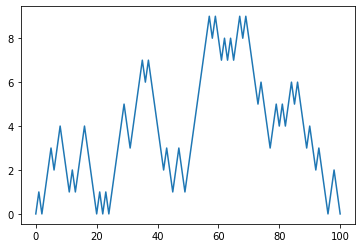

In [6]:
def random_dyck_path(n):
    # produce a (2n+1)-step random walk from 0 to -1
    increments = [1]*n +[-1]*(n+1)
    rng.shuffle(increments)
    unconstrained_walk = np.cumsum(increments)
    # determine the first time it reaches its minimum
    argmin = np.argmin(unconstrained_walk)
    # cyclically permute the increments to ensure walk stays non-negative until last step
    rotated_increments = np.roll(increments,-argmin)
    # turn off the superfluous -1 step
    rotated_increments[0] = 0
    # produce dyck path from increments
    walk = np.cumsum(rotated_increments)
    return walk


plt.plot(random_dyck_path(50))
plt.show()

__(a)__ Let $H$ be the (maximal) height of $X$, i.e. $H=\max_i X_i$. Estimate the expected height $\mathbb{E}[H]$ for $n = 2^5, 2^6, \ldots, 2^{14}$ (including error bars). Determine the growth $\mathbb{E}[H] \approx a\,n^\beta$ via an appropriate fit. *Hint*: use the `scipy.optimize.curve_fit` function with the option `sigma = ...` to incorporate the standard errors on $\mathbb{E}[H]$ in the fit. Note that when you supply the errors appropriately, fitting on linear or logarithmic scale should result in the same answer.

__(b)__ Produce a histogram of the height $H / \sqrt{n}$ and demonstrate with a plot that it appears to converge in distribution as $n\to\infty$. *Hint*: you could call `plt.hist(...,density=True,histtype='step')` for each $n$ to plot the densities on top of each other.

## Feedback

Please use the following Google form to give anonymous and constructive feedback on the lecture and/or these exercises. This is an easy way to contribute to improving the course: https://forms.gle/BxTYSWTGZtTnXEnu8